# Fake News Classifier

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

In [20]:
# Import Dataset
df = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\Fake News Classifier\\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
# Checking for Null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [22]:
# Removing NaNs
df = df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [23]:
# Resetting Index
df = df.reset_index()
# Drop index column
df = df.drop(columns = ["index"])
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [24]:
# Get "title" column from df as we are only concerned with title column
Messages = df["title"].copy()
print(Messages.head())

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object


In [25]:
Messages[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [26]:
Messages[1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [27]:
# Removing stop words from Messages and applying stemming

# Create object of PorterStemmer
ps = PorterStemmer()

# Get stop words
stop_words = stopwords.words("english")

# Create an empty list to store all preprocessed messages
preprocessed_messages = []

# Creating a for loop for preprocessing
for i in range(0, len(Messages)):
    # Remove the all character which are not alphabet
    message = re.sub("[^a-zA-Z]", " ", Messages[i])
    # Convert everything into lower case
    message = message.lower()
    # Splitting message to list of words
    message_words_list = message.split()
    # Remove stopwords and apply stemming in a single step
    message_without_stopwords = [ps.stem(word) for word in message_words_list if word not in stop_words]
    # Join the words with .join()
    message_without_stopwords = " ".join(message_without_stopwords)
    # Append above message to preprocessed_messages
    preprocessed_messages.append(message_without_stopwords)

In [28]:
# Print preprocessed messages
preprocessed_messages[0:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [29]:
# Applying CountVectorizer

# Create object of CountVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,3), max_features = 5000)

# Fitting tfidf and taking in variable "X" [X --> Independent Variable]
X = tfidf.fit_transform(preprocessed_messages).toarray()

In [30]:
# Getting Dependent variable "y"
y = df["label"]

In [31]:
# Divide data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [32]:
# Printing X_train
X_train[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Converting X_train to DataFrame
X_train = pd.DataFrame(X_train, columns = tfidf.get_feature_names())
X_train.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Building MultinomialNB Model

# Create object of Multinomial Model
MNB_model = MultinomialNB()

# Fit the model with train data
MNB_model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.8810273405136703


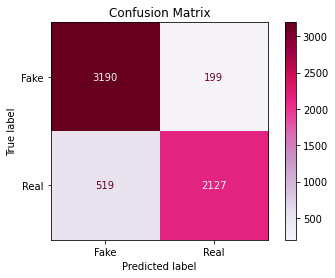

In [35]:
# Predict on test data
y_pred = MNB_model.predict(X_test)

# Print accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot Confusion matrix
plot_confusion_matrix(MNB_model, X_test, y_test, display_labels = ["Fake", "Real"], cmap = "PuRd")
plt.title("Confusion Matrix")
plt.show()

Out of `3190 + 345 = 3389` Fake messages 94.12 % were classified correctly and out of `519 + 2127 = 2646` Real messages 80.38 % were classified correctly.